In [1]:
path="C:/Users/pabba/.cache/kagglehub/datasets/aliredaelblgihy/social-media-engagement-report/versions/1"


In [2]:
import pandas as pd
# Load the dataset
df=pd.read_excel(path + "/social_media_engagement_data.xlsx")
df.head()

,Platform,Post ID,Post Type,Post Content,Post Timestamp,Likes,Comments,Shares,Impressions,Reach,Engagement Rate,Audience Age,Audience Gender,Audience Location,Audience Interests,Campaign ID,Sentiment,Influencer ID
0,LinkedIn,d49dadb4-fc1e-4775-88ad-d60b75cf5123,Video,Want that according same wish.,2021-04-23 08:19:49.255,415,77,85,2619,1842,31.32,29,Other,United Kingdom,respond,NaN,Negative,NaN
1,Instagram,16ce29c5-2dc7-478f-9814-a86754f3ce8b,Video,Increase fast partner south.,2023-07-30 06:40:06.356,908,125,85,1223,3884,28.78,48,Male,Greece,population,NaN,Neutral,NaN
2,Instagram,6a6cc741-72f4-4111-95a0-c5ee04a175a8,Video,Lawyer behavior born window couple sister.,2021-12-05 03:56:53.212,412,419,58,2165,849,104.71,55,Male,United States Virgin Islands,himself,NaN,Neutral,NaN
3,Twitter,0b5a3e70-c556-43cb-ad4f-a1d0003348bc,Image,Street great decade must.,2021-09-28 20:39:00.228,667,153,29,7191,3519,24.13,54,Other,Zambia,safe,NaN,NaN,NaN
4,Facebook,a7d3e958-e2fe-411e-a24a-b96e821fc050,Link,At clear meeting with reason ground continue c...,2023-02-27 17:51:21.425,659,215,34,3312,2032,44.69,33,Other,Afghanistan,well,6052b8d2-3403-4447-b0b4-c5ce20e6c8d0,NaN,NaN


C:\Users\pabba\AppData\Local\Temp\ipykernel_16308\210426423.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = instagram_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().unstack()
C:\Users\pabba\AppData\Local\Temp\ipykernel_16308\210426423.py:31: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


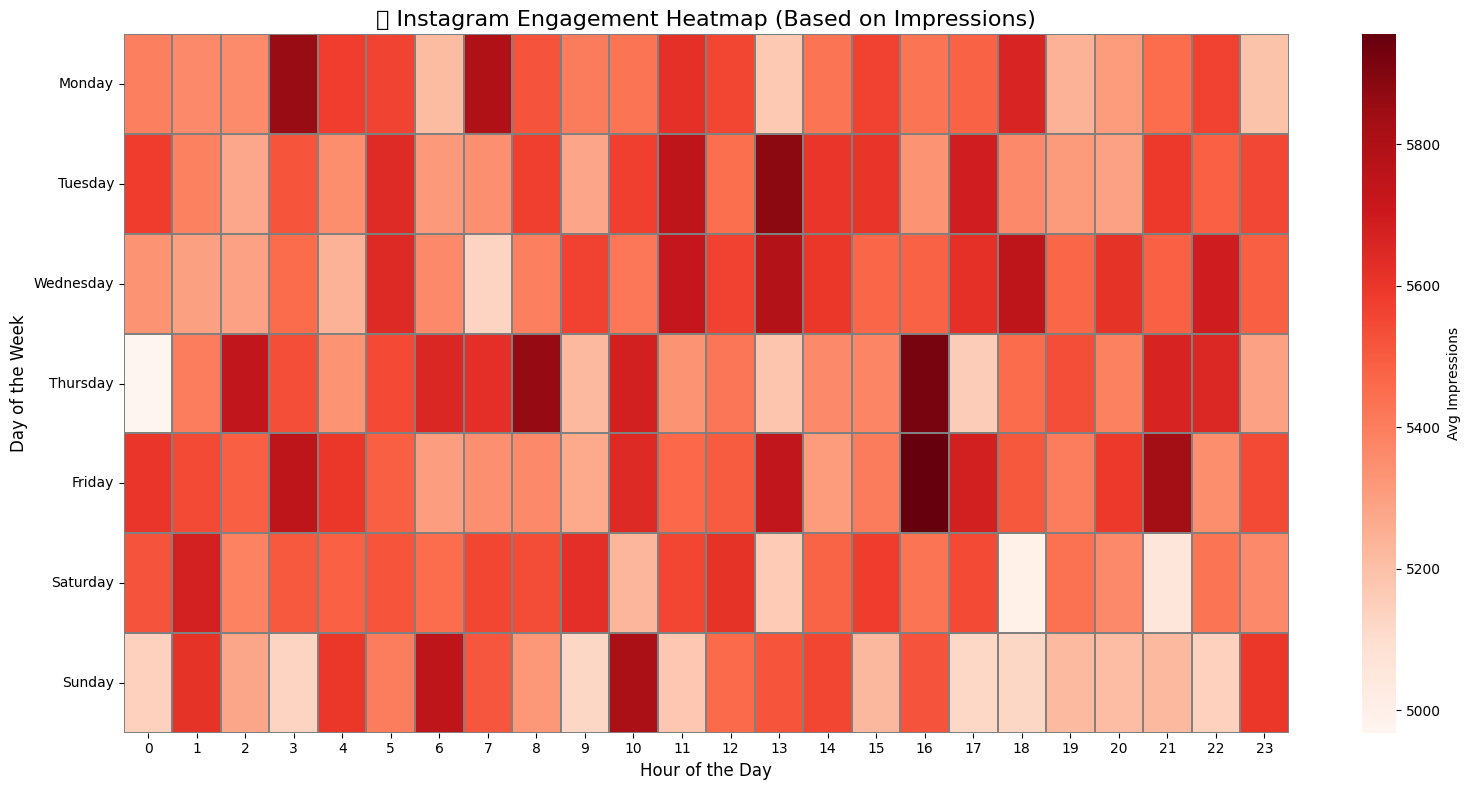

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Keep only LinkedIn posts
instagram_df = df[df['Platform'] == 'Instagram'].copy()

# Convert to datetime if needed
instagram_df['Post Timestamp'] = pd.to_datetime(instagram_df['Post Timestamp'])

# Extract Hour and Day
instagram_df['Hour'] = instagram_df['Post Timestamp'].dt.hour
instagram_df['Weekday'] = instagram_df['Post Timestamp'].dt.day_name()

# Reorder weekdays to logical order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
instagram_df['Weekday'] = pd.Categorical(instagram_df['Weekday'], categories=ordered_days, ordered=True)

# Group by Weekday and Hour
heatmap_data = instagram_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().unstack()

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, cmap='Reds', linewidths=0.3, linecolor='gray', annot=False, cbar_kws={'label': 'Avg Impressions'})
plt.title('🔍 Instagram Engagement Heatmap (Based on Impressions)', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Day of the Week', fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\pabba\AppData\Local\Temp\ipykernel_16308\3169850267.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_trend = instagram_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().reset_index()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\p

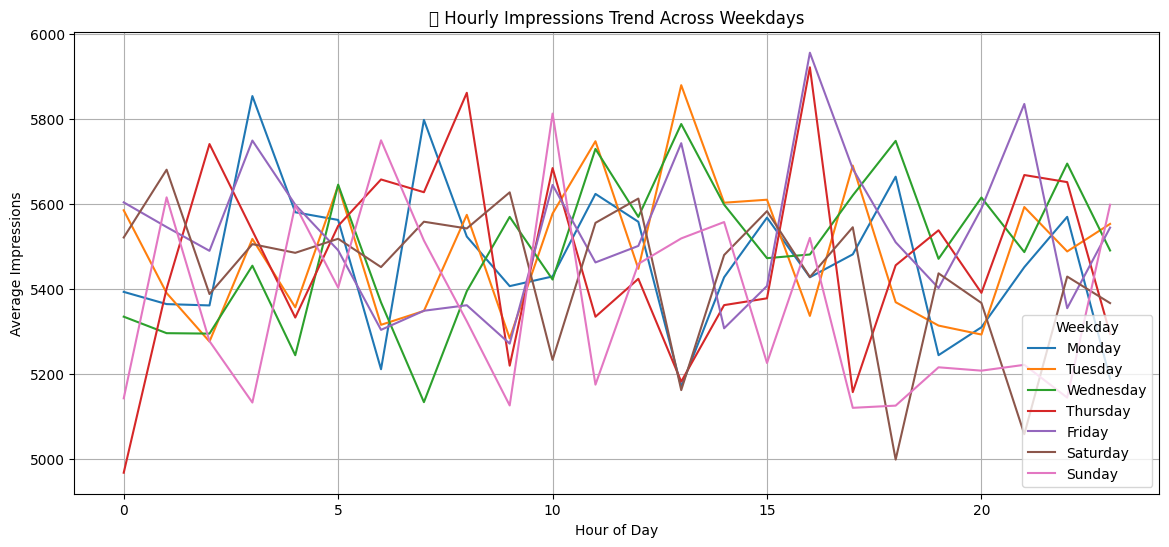

In [6]:
hourly_trend = instagram_df.groupby(['Weekday', 'Hour'])['Impressions'].mean().reset_index()
plt.figure(figsize=(14, 6))
sns.lineplot(data=hourly_trend, x='Hour', y='Impressions', hue='Weekday', palette='tab10')
plt.title('📈 Hourly Impressions Trend Across Weekdays')
plt.xlabel('Hour of Day')
plt.ylabel('Average Impressions')
plt.grid(True)
plt.show()


c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

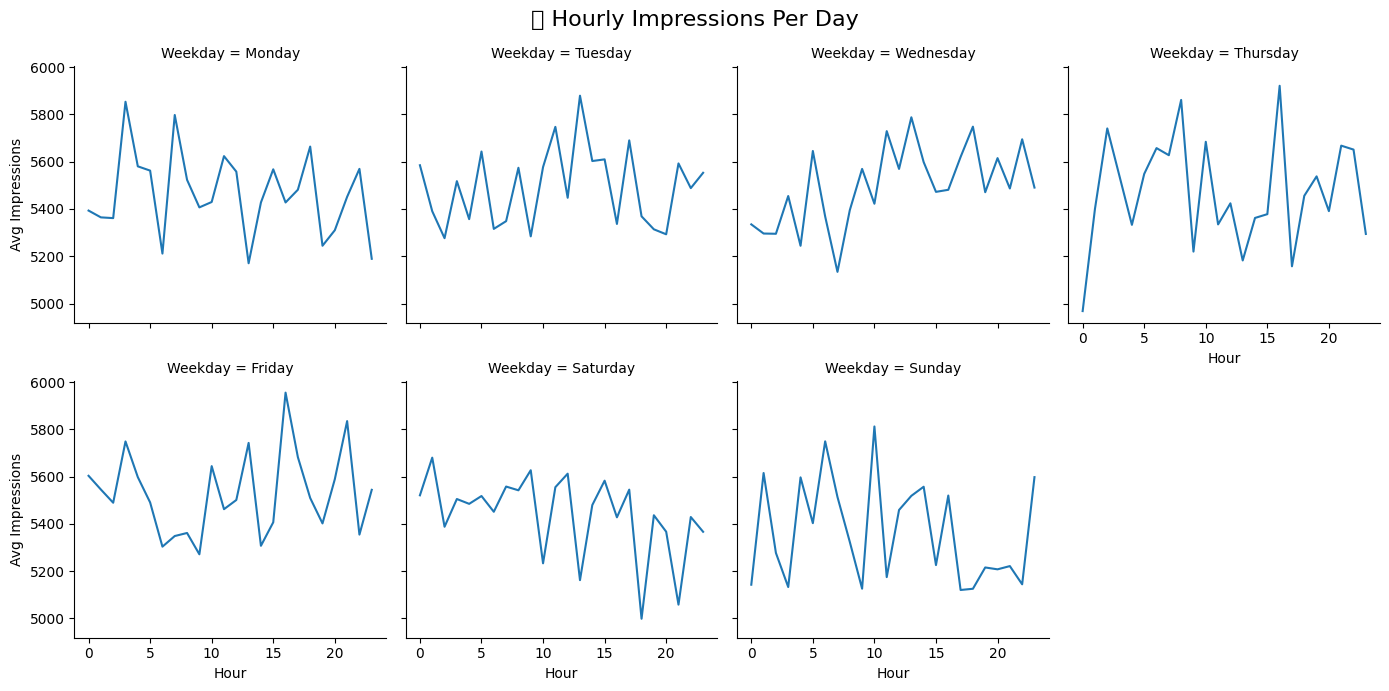

In [7]:
g = sns.FacetGrid(hourly_trend, col='Weekday', col_wrap=4, height=3.5, sharey=True)
g.map(sns.lineplot, 'Hour', 'Impressions')
g.fig.suptitle('📊 Hourly Impressions Per Day', fontsize=16)
g.set_axis_labels('Hour', 'Avg Impressions')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


C:\Users\pabba\AppData\Local\Temp\ipykernel_16308\2087591048.py:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
c:\Users\pabba\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


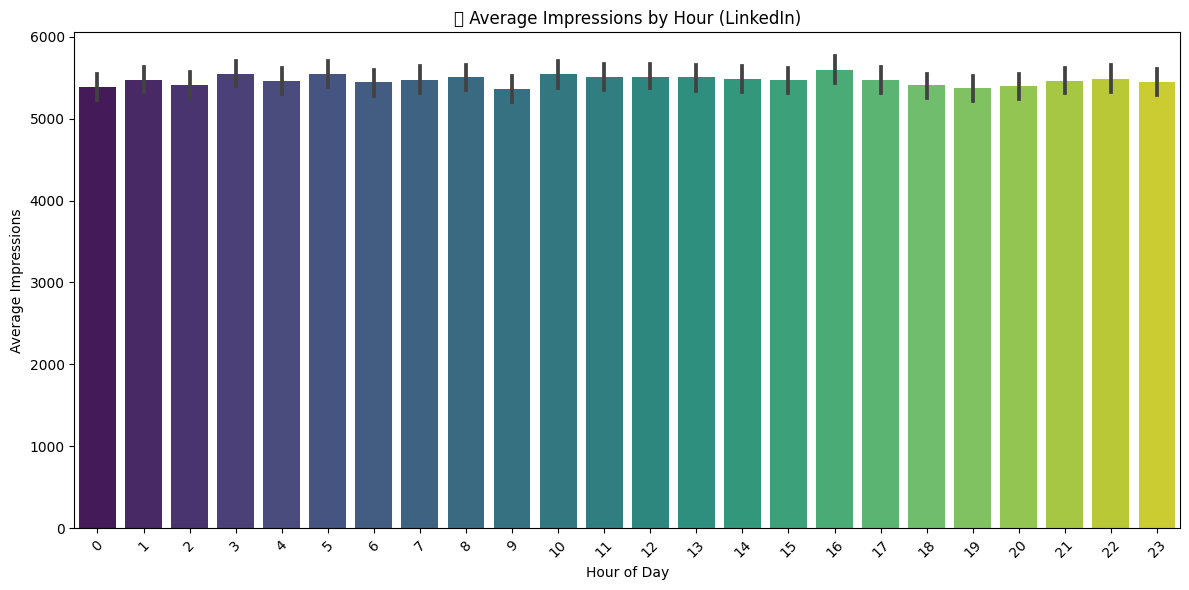

In [8]:
plt.figure(figsize=(12,6))
sns.barplot(data=instagram_df,x='Hour',y='Impressions',palette='viridis')
plt.title('📊 Average Impressions by Hour (LinkedIn)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Impressions')
plt.xticks(range(0, 24), rotation=45)
plt.tight_layout()
plt.show()